This notebook is part of the PyImageJ [Tutorial Series](./notebooks.rst), and assumes familiarity with the ImageJ API. Dedicated tutorials for ImageJ can be found [here](https://imagej.net/tutorials/).

# 2 Working with Java classes and Python

PyImageJ is built on the [scyjava](https://pypi.org/project/scyjava) library, which is built on [JPype](https://jpype.readthedocs.io/) and [jgo](https://pypi.org/project/jgo). These libraries enable us to import any available Java class into our Python program, and use its full API, just as we could from within a Java program.

## 2.1 Importing Java classes into Python

To import Java classes, use the `scyjava.jimport` function with a string argument, passing the full name of the Java class you would like to import, assigning the result to a variable.

For example, to import the `java.lang.System` class, you could write:

```python
from scyjava import jimport
System = jimport('java.lang.System')
```

`scyjava.jimport` is all that is needed to use Java objects/resources in Python. For example importing `java.lang.Runtime` allows us to inspect the memory available to our Java Virtual Machine (JVM). First let's initialize ImageJ:

In [1]:
import imagej
from scyjava import jimport

# initialize ImageJ
ij = imagej.init()
print(f"ImageJ version: {ij.getVersion()}")

ImageJ version: 2.9.0/1.53t


Now we can import `java.lang.Runtime` and inspect the JVM memory:

In [2]:
Runtime = jimport('java.lang.Runtime')
print(Runtime.getRuntime().maxMemory() // (2**20), " MB available to Java")

14235  MB available to Java


You can use `scyjava.jimport` to directly access ImageJ/Fiji's java classes. In the example below we will  a sample image and apply a mean blur to the image with ImageJ Ops. One of the parameters for the `ij.op().filter.mean()` method is a `HyperSphereShape` (_i.e._ the radius used by the mean filter to apply the mean). To create this object we will use `jimport` to import the appropriate Java class.

For more information on working with images, see [06 Working with Images](06-Working-with-Images.ipynb).

_The sample images used in this notebook are available on the PyImageJ GitHub repository [here](https://github.com/imagej/pyimagej/tree/master/doc/sample-data)._

The compare_version function is deprecated. Use is_version_at_least instead.


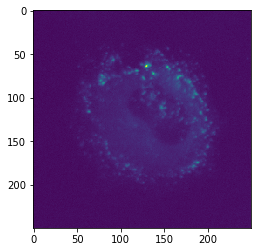

In [3]:
# load test image
dataset = ij.io().open('sample-data/test_image.tif')

# display test image (see the Working with Images for more info)
ij.py.show(dataset)

The compare_version function is deprecated. Use is_version_at_least instead.


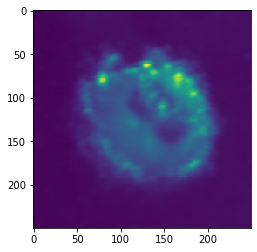

In [4]:
# import HyperSphereShape and create radius of 5
HyperSphereShape = jimport('net.imglib2.algorithm.neighborhood.HyperSphereShape')
radius = HyperSphereShape(5)

# apply filter
result = ij.dataset().create(dataset)
ij.op().filter().mean(result, dataset, radius)

# show image
ij.py.show(result)

Please note that the `mean` filter Op expects an output image, input image and radius (`HyperSphereShape`). This Op will fail to execute without a specified output image. Thus in this example we call `ij.dataset().create()` and pass in the original image data (_i.e._ `dataset`). This creates another dataset that has the same parameters as the input which can be used as the output image for the `mean` filter Op.